# 🟣🟠🟡**In the study, the data set (credit_risk_dataset) was preferred. The aim of the study is to analyze the "loan_status" variable in your credit risk area data. The most successful classification model was identified and modeled with the PyCaret library.**

# **🔵🟣🟠In order to perform modeling with PyCaret, the types of data in the data set used must be numeric. For this purpose, data in categorical and object data types were transformed into numerical data. The operations are completed with one hot and label encoding.**

#  **1.Import Libraries**📒

In [1]:
!pip install -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.1 MB/s eta 0:00:00
  Using cached importlib_metadata-6.0.0-py3-none-any.whl (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 33.9

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from pycaret.classification import setup
from pycaret.classification import plot_model
from pycaret.classification  import create_model
from pycaret.classification import compare_models
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


# **2.Getting to know the dataset**📊

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width",500)

In [4]:
df=pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
def check_dt(dataframe):
    print("SHAPE".center(70, "-"))
    print(dataframe.shape)
    print("TYPE".center(70, "-"))
    print(dataframe.dtypes)
    print("INFO".center(70, "-"))
    print(dataframe.info())
    print("NA".center(70, "-"))
    print(dataframe.isnull().sum())
    print("DESCRIBE".center(70, "-"))
    print(dataframe.describe().T)
    print("NUNIQUE".center(70, "-"))
    print(dataframe.nunique())
check_dt(df)

--------------------------------SHAPE---------------------------------
(32581, 12)
---------------------------------TYPE---------------------------------
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income       

# **3.Classifying variables**🐈

In [6]:
for col in df.columns:
  if df[col].dtypes == "bool":
    df[col]= df[col].astype(int)
def grab_col_names(data_frame, col_th=10, car_th=100):
    
    cat_col=[ col for col in df.columns if str(df[col].dtype) in ["category","object","bool"]]
    num_but_cat=[col for col in df.columns if df[col].nunique() < col_th and df[col].dtypes in ["int64","float"]]
    cat_col= cat_col + num_but_cat
    cat_but_car=[col for col in cat_col if df[col].nunique() > car_th and str(df[col].dtypes) in ["category","object"]]
    cat_col=[col for col in cat_col if col not in cat_but_car]
    num_col= [col for col in df.columns if df[col].dtypes in ["int","float"]]
    num_col=[col for col in num_col if col not in cat_col]
    print(f"Observations: {data_frame.shape[0]}")
    print(f"Veriable: {data_frame.shape[1]}")
    print(f"cat_cols: {len(cat_col)}")
    print(f"num_cols: {len(num_col)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_col, num_col, cat_but_car

cat_col, num_col, cat_but_car=grab_col_names(df)

Observations: 32581
Veriable: 12
cat_cols: 5
num_cols: 7
cat_but_car: 0
num_but_cat: 1


# **4.Missing data editing**📓​📘​📗

👏🙌👍**In the second part, missing data in the data set were determined. Accordingly, the average of the variables with missing data was taken. Nan values updated with averages taken**

In [7]:
df["person_emp_length"].mean()

4.789686296787225

In [8]:
df["person_emp_length"]= df["person_emp_length"].fillna(df["person_emp_length"].mean())
df["loan_int_rate"]= df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

In [9]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# **5.Label and one hot encoding**🔟💯

**In order to create a model with the PyCaret library, all variables must be in numerical format. For this, the variables were converted to numeric format.**

🏅🥇**LABEL ENCODING**

In [10]:
def label_encoder(dataframe):
    for col in dataframe.columns:
        if dataframe[col].nunique() < 3 and str(dataframe[col].dtypes) in ["category","object"] :
            le= preprocessing.LabelEncoder()
            dataframe[col] = le.fit_transform(dataframe[col].astype(str))
            return dataframe
df = label_encoder(df)

🏅🥇**ONE_HOT ENCODING**

In [11]:
def one_hot(dataframe):
    for col in dataframe.columns:
        if 2 < dataframe[col].nunique() < 8 and str(dataframe[col].dtypes) in ["category","object"]:
            dataframe=pd.get_dummies(dataframe,columns=[col])
    return dataframe
df = one_hot(df)

In [12]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


# **6.Modeling with pycaret**🏆

In [13]:
exp1=setup(data=df,target="loan_status")

,Description,Value
0,Session id,2630
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 26)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [14]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9362,0.9440,0.7268,0.9741,0.8323,0.7939,0.8070,7.3490
xgboost,Extreme Gradient Boosting,0.9353,0.9490,0.7401,0.9527,0.8330,0.7936,0.8034,1.3930
lightgbm,Light Gradient Boosting Machine,0.9349,0.9457,0.7206,0.9745,0.8284,0.7894,0.8032,0.6300
rf,Random Forest Classifier,0.9316,0.9302,0.7126,0.9644,0.8194,0.7784,0.7920,1.1010
gbc,Gradient Boosting Classifier,0.9248,0.9259,0.6971,0.9432,0.8015,0.7564,0.7697,1.0900
et,Extra Trees Classifier,0.9180,0.9135,0.6742,0.9312,0.7819,0.7330,0.7476,1.0150
dt,Decision Tree Classifier,0.8886,0.8431,0.7624,0.7364,0.7490,0.6775,0.6777,0.1110
ada,Ada Boost Classifier,0.8833,0.8978,0.6398,0.7855,0.7051,0.6333,0.6385,0.4100
lda,Linear Discriminant Analysis,0.8630,0.8649,0.5775,0.7378,0.6476,0.5642,0.5708,0.0800
ridge,Ridge Classifier,0.8578,0.0000,0.5051,0.7630,0.6076,0.5252,0.5419,0.0400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [15]:
model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9413,0.9474,0.7465,0.9789,0.8470,0.8115,0.8229
1,0.9334,0.9485,0.7028,0.9887,0.8216,0.7821,0.7993
2,0.9364,0.9423,0.7410,0.9584,0.8358,0.7972,0.8073
3,0.9290,0.9422,0.6948,0.9719,0.8103,0.7681,0.7845
4,0.9342,0.9364,0.7229,0.9677,0.8276,0.7880,0.8008
5,0.9320,0.9302,0.7008,0.9831,0.8183,0.7779,0.7948
6,0.9390,0.9501,0.7465,0.9661,0.8422,0.8052,0.8155
7,0.9395,0.9484,0.7344,0.9838,0.8410,0.8046,0.8177
8,0.9377,0.9462,0.7344,0.9733,0.8372,0.7996,0.8117


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

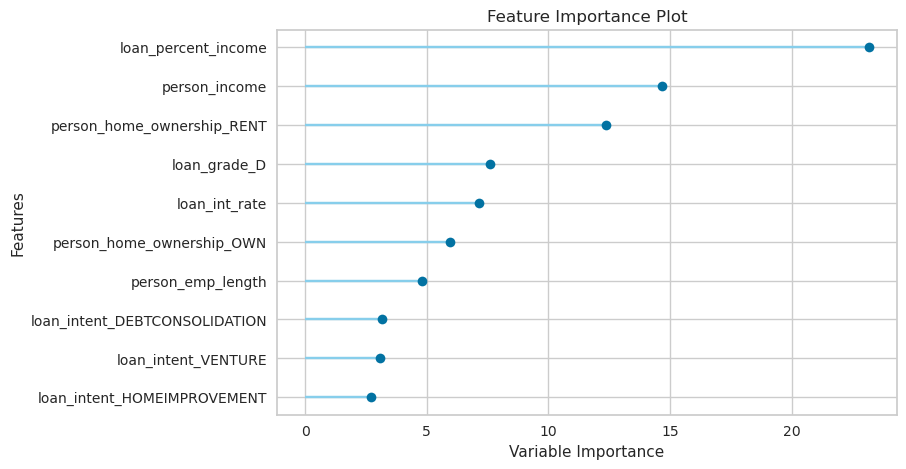

In [16]:
plot_model(model,plot="feature")